In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Regression Model on a DataSet using TF

In [4]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance.shape

(1338, 7)

In [8]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# turn categorical features to dummy variables
df = pd.get_dummies(insurance)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [10]:
# Split into independent and Dependent Variables
X = df.drop("charges", axis=1)
y = df["charges"]

In [17]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.20, random_state=42)

# Building a Regression model

In [19]:
#  set random seed
tf.random.set_seed(42)

# create mode
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


# compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.SGD(),
                       metrics=["mae"])

# fit the model
insurance_model.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 6ms/step - loss: 8637.0996 - mae: 8637.0996
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7558.1475 - mae: 7558.1475
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 7589.9854 - mae: 7589.9854
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7698.5596 - mae: 7698.5596
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7496.7793 - mae: 7496.7793
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7493.1753 - mae: 7493.1753

34/34 [==============================] - 0s 5ms/step - loss: 7176.5215 - mae: 7176.5215
Epoch 83/100
34/34 [==============================] - 0s 5ms/step - loss: 7425.6299 - mae: 7425.6299
Epoch 84/100
34/34 [==============================] - 0s 5ms/step - loss: 7403.1294 - mae: 7403.1294
Epoch 85/100
34/34 [==============================] - 0s 5ms/step - loss: 7356.0083 - mae: 7356.0083
Epoch 86/100
34/34 [==============================] - 0s 5ms/step - loss: 7484.7271 - mae: 7484.7271
Epoch 87/100
34/34 [==============================] - 0s 5ms/step - loss: 7217.6079 - mae: 7217.6079
Epoch 88/100
34/34 [==============================] - 0s 5ms/step - loss: 7260.9995 - mae: 7260.9995
Epoch 89/100
34/34 [==============================] - 0s 5ms/step - loss: 7134.1562 - mae: 7134.1562
Epoch 90/100
34/34 [==============================] - 0s 5ms/step - loss: 7083.4360 - mae: 7083.4360
Epoch 91/100
34/34 [==============================] - 0s 5ms/step - loss: 7254.1782 - mae: 7254.1782
Epo

since we are using the data in a pandas dataframe format, we don't need to using expand_ndims during model.fit as pandas is built on top of numpy arrays

In [20]:
# Check results on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7023.3296 - mae: 7023.3296


[7023.32958984375, 7023.32958984375]

In [21]:
print(y_train.median())
print(y_train.mean())

9575.4421
13346.089736364485


# Improve The model

### model 2

In [23]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [24]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4924.5107 - mae: 4924.5107


[4924.5107421875, 4924.5107421875]

### model 3

In [27]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 1s 8ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 7ms/step - loss: 13104.4287 - mae: 13104.4287
Epoch 3/200
34/34 [==============================] - 0s 7ms/step - loss: 12749.5400 - mae: 12749.5400
Epoch 4/200
34/34 [==============================] - 0s 7ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 7ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 7ms/step - loss: 9457.7188 - mae: 9457.7188
Epoch 7/200
34/34 [==============================] - 0s 7ms/step - loss: 8147.6533 - mae: 8147.6533
Epoch 8/200
34/34 [==============================] - 0s 7ms/step - loss: 7528.8403 - mae: 7528.8403
Epoch 9/200
34/34 [==============================] - 0s 6ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 5ms/step - loss: 7409.0811 - mae:

34/34 [==============================] - 0s 6ms/step - loss: 5834.3076 - mae: 5834.3076
Epoch 83/200
34/34 [==============================] - 0s 5ms/step - loss: 5805.8242 - mae: 5805.8242
Epoch 84/200
34/34 [==============================] - 0s 6ms/step - loss: 5772.3237 - mae: 5772.3237
Epoch 85/200
34/34 [==============================] - 0s 6ms/step - loss: 5745.1519 - mae: 5745.1519
Epoch 86/200
34/34 [==============================] - 0s 6ms/step - loss: 5711.3491 - mae: 5711.3491
Epoch 87/200
34/34 [==============================] - 0s 6ms/step - loss: 5674.5220 - mae: 5674.5220
Epoch 88/200
34/34 [==============================] - 0s 6ms/step - loss: 5639.4927 - mae: 5639.4927
Epoch 89/200
34/34 [==============================] - 0s 6ms/step - loss: 5600.6665 - mae: 5600.6665
Epoch 90/200
34/34 [==============================] - 0s 6ms/step - loss: 5559.4336 - mae: 5559.4336
Epoch 91/200
34/34 [==============================] - 0s 6ms/step - loss: 5523.6196 - mae: 5523.6196
Epo

34/34 [==============================] - 0s 6ms/step - loss: 3725.3667 - mae: 3725.3667
Epoch 163/200
34/34 [==============================] - 0s 7ms/step - loss: 3722.9509 - mae: 3722.9509
Epoch 164/200
34/34 [==============================] - 0s 7ms/step - loss: 3727.0620 - mae: 3727.0620
Epoch 165/200
34/34 [==============================] - 0s 6ms/step - loss: 3717.6619 - mae: 3717.6619
Epoch 166/200
34/34 [==============================] - 0s 6ms/step - loss: 3720.3694 - mae: 3720.3694
Epoch 167/200
34/34 [==============================] - 0s 5ms/step - loss: 3720.2913 - mae: 3720.2913
Epoch 168/200
34/34 [==============================] - 0s 5ms/step - loss: 3717.2759 - mae: 3717.2759
Epoch 169/200
34/34 [==============================] - 0s 6ms/step - loss: 3713.5613 - mae: 3713.5613
Epoch 170/200
34/34 [==============================] - 0s 6ms/step - loss: 3708.0085 - mae: 3708.0085
Epoch 171/200
34/34 [==============================] - 0s 6ms/step - loss: 3707.6399 - mae: 3707

In [28]:
# Evaluate our larger model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 3494.5322 - mae: 3494.5322


[3494.5322265625, 3494.5322265625]

### plot history (also known as loss curve or a training curve)

Text(0.5, 0, 'epochs')

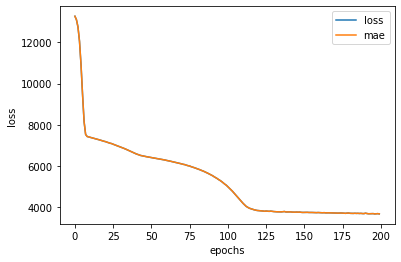

In [29]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [31]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 7ms/step - loss: 3700.3804 - mae: 3700.3804
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 3695.7061 - mae: 3695.7061
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 3697.1318 - mae: 3697.1318
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 3697.0056 - mae: 3697.0056
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 3692.6018 - mae: 3692.6018
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 3701.2529 - mae: 3701.2529
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 3693.6267 - mae: 3693.6267
Epoch 8/100
34/34 [==============================] - 0s 7ms/step - loss: 3690.4976 - mae: 3690.4976
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 3686.6111 - mae: 3686.6111
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 3695.5996 - mae: 3695.5996

34/34 [==============================] - 0s 6ms/step - loss: 3559.6582 - mae: 3559.6582
Epoch 83/100
34/34 [==============================] - 0s 6ms/step - loss: 3559.5845 - mae: 3559.5845
Epoch 84/100
34/34 [==============================] - 0s 6ms/step - loss: 3559.8337 - mae: 3559.8337
Epoch 85/100
34/34 [==============================] - 0s 6ms/step - loss: 3554.9226 - mae: 3554.9226
Epoch 86/100
34/34 [==============================] - 0s 6ms/step - loss: 3554.1392 - mae: 3554.1392
Epoch 87/100
34/34 [==============================] - 0s 6ms/step - loss: 3555.9019 - mae: 3555.9019
Epoch 88/100
34/34 [==============================] - 0s 6ms/step - loss: 3553.3438 - mae: 3553.3438
Epoch 89/100
34/34 [==============================] - 0s 6ms/step - loss: 3553.5947 - mae: 3553.5947
Epoch 90/100
34/34 [==============================] - 0s 6ms/step - loss: 3549.5474 - mae: 3549.5474
Epoch 91/100
34/34 [==============================] - 0s 6ms/step - loss: 3548.4673 - mae: 3548.4673
Epo

In [32]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 6ms/step - loss: 3288.5007 - mae: 3288.5007


(3288.500732421875, 3288.500732421875)

**Training for an extra 100 epochs we see about a 10% decrease in error.**

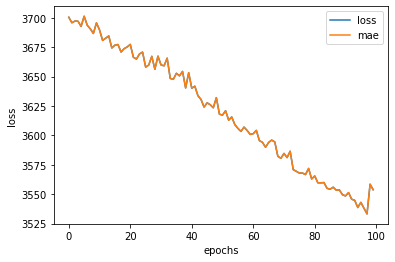

In [33]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

# Normalization and Standardization

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [37]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [40]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [41]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [42]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

### build model on this data

In [44]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=1) 

Epoch 1/200
34/34 [==============================] - 1s 8ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/200
34/34 [==============================] - 0s 8ms/step - loss: 13333.4795 - mae: 13333.4795
Epoch 3/200
34/34 [==============================] - 0s 7ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 7ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 7ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/200
34/34 [==============================] - 0s 7ms/step - loss: 13066.4482 - mae: 13066.4482
Epoch 7/200
34/34 [==============================] - 0s 7ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 6ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 6ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 6ms/step - loss: 11925.96

34/34 [==============================] - 0s 6ms/step - loss: 3676.9768 - mae: 3676.9768
Epoch 82/200
34/34 [==============================] - 0s 6ms/step - loss: 3673.9495 - mae: 3673.9495
Epoch 83/200
34/34 [==============================] - 0s 6ms/step - loss: 3667.8452 - mae: 3667.8452
Epoch 84/200
34/34 [==============================] - 0s 6ms/step - loss: 3664.5759 - mae: 3664.5759
Epoch 85/200
34/34 [==============================] - 0s 6ms/step - loss: 3661.8562 - mae: 3661.8562
Epoch 86/200
34/34 [==============================] - 0s 6ms/step - loss: 3660.3049 - mae: 3660.3049
Epoch 87/200
34/34 [==============================] - 0s 6ms/step - loss: 3657.5134 - mae: 3657.5134
Epoch 88/200
34/34 [==============================] - 0s 6ms/step - loss: 3655.2202 - mae: 3655.2202
Epoch 89/200
34/34 [==============================] - 0s 6ms/step - loss: 3653.8835 - mae: 3653.8835
Epoch 90/200
34/34 [==============================] - 0s 6ms/step - loss: 3652.0195 - mae: 3652.0195
Epo

34/34 [==============================] - 0s 6ms/step - loss: 3529.6245 - mae: 3529.6245
Epoch 162/200
34/34 [==============================] - 0s 6ms/step - loss: 3529.0967 - mae: 3529.0967
Epoch 163/200
34/34 [==============================] - 0s 6ms/step - loss: 3527.5432 - mae: 3527.5432
Epoch 164/200
34/34 [==============================] - 0s 6ms/step - loss: 3526.2847 - mae: 3526.2847
Epoch 165/200
34/34 [==============================] - 0s 6ms/step - loss: 3524.1589 - mae: 3524.1589
Epoch 166/200
34/34 [==============================] - 0s 6ms/step - loss: 3522.7068 - mae: 3522.7068
Epoch 167/200
34/34 [==============================] - 0s 6ms/step - loss: 3521.8071 - mae: 3521.8071
Epoch 168/200
34/34 [==============================] - 0s 5ms/step - loss: 3520.5659 - mae: 3520.5659
Epoch 169/200
34/34 [==============================] - 0s 6ms/step - loss: 3519.4634 - mae: 3519.4634
Epoch 170/200
34/34 [==============================] - 0s 6ms/step - loss: 3518.0566 - mae: 3518

In [45]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3171.5781 - mae: 3171.5781


In [46]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(3288.500732421875, 3171.578125)